# Convolutional Neural Network for image classifications

## Load MNIST data

Training set: 60,000 handwritten digits from 0 to 9;

Test set: 10,000 handwritten digits from 0 to 9.

In [2]:
import torch
import torchvision ##download of the MNIST dataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms ##transform data into tensor and normalize them

In [4]:
img_tr = transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307, ), (0.3081, )) ##m and sd of the MNIST training set
                            ])

In [5]:
trainset = datasets.MNIST('./data', train=True, transform=img_tr, download=True)
testset = datasets.MNIST('./data', train=False, transform=img_tr, download=True)

In [6]:
##DataLoader = iterator which allows (1) batching the data; (2) shuffle the data
trainload = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testload = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

In [7]:
d = next(iter(trainload))

In [14]:
d

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       

torch.Size([1, 28, 28])


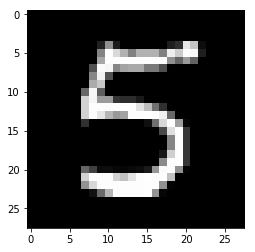

In [5]:
##data visualization
import matplotlib.pyplot as plt
%matplotlib inline

def plt_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    sd = 0.3081
    image = ((mean * image) + sd)
    plt.imshow(image, cmap='gray')
    
#pull a batch of data from the DataLoader and plot the images
sample_data = next(iter(trainload))
plt_img(sample_data[0][1])
plt_img(sample_data[0][2])

##image dimension
print(sample_data[0][1].size())

## Building a CNN
The architecture will contain:
- `Conv2d`;
- `MaxPool2d`;
- `Rectified Linear Unit (ReLU)`;
- View;
- Linear layer.

### Conv2d
A convolution filter (kernel) is applied to the input by moving it based on the stride value.

_Stride_ is the number of values to be skipped ($1$ by default).

_Padding_ prevents the filter to stop before being applied to all the data. Basically, zeros are added to both ends of a tensor. 

Values in the kernel are randomly initialized and trained trhough backpropagation and gradient descent.

The kernel sizes that are commonly used are 1, 3, 5, and 7. The larger the kernel size, the larger the area that it can cover. Usually, high-dimensional filters are applied to the input data in the early layers.

In [ ]:
##Convolution on a vector 
import torch.nn as nn

conv = nn.Conv1d(1, 1, 3, bias=False) ##kernel 1x3
sample = torch.randn(1, 1, 7)
conv(sample)

In [ ]:
conv.weight

### MaxPool2d
After convolutional layers it is common practice to add pooling layers. They reduce the size of the feature maps and the outcomes of convolution layers.

MaxPool2d acts on the data generated by each filter from the previous layer. If the kernel size is $2\times 2$, it considers that size in the image and picks the $\max$ of that area.

Another technique that is used is __average pooling__, where the $\max$ is replaced by the average.

### ReLU
It is best practice to add a nonlinear layer after the pooling layer, or after convolution. The nonlinear function is applied to each element of the feature maps. 

An example of a rectifier is the activation function: $f(x)=\max(0,x)$.

### View
It is common practice to use a fully connected (or linear) layer at the end of most networks, when dealing with image classification problems. If we are using a two-dimensional convolution, this takes a matrix of numbers as input and outputs another matix of numbers. Hence, to apply a linear layer, we need to flatten the matrix to a vector of one-dimension.

```
x.view(-1, 320)
```

The `view` method will flatten an n-dimension tensor to a one-dimensional tensor (i.e. vector). Since the input data, after batching have dimension $32\times 1 \times 28 \times 28$ (i.e. batch size x channel (BW image) x height x width), we do not want to flatten/mix data for different images, so the first argument that we pass to the function is $-1$ which correspond to saying "avoid flattening data on the first dimension".

### Linear layer
After flattening data we pass them through a linear layer, followed by a nonlinear activation. The `log_softmax` is the final activation and predicts the digits contained in the given image.

## CNN architecture

In [6]:
##CNN ARCHITECTURE
##Conv2d --> MaxPool2d --> ReLU 
##Conv2d --> dropout --> MaxPool2d --> ReLU
##view --> 
##FC --> ReLU
##dropout --> FC --> 
##Log_softmax
import torch.nn as nn
import torch.nn.functional as F

class cnn(nn.Module):
    
    def __init__(self):
        super(cnn, self).__init__()
        ##class torch.nn.Conv2d(in_channels, out_channels, kernel_size, 
        ##                      stride=1, padding=0, dilation=1, groups=1, 
        ##                      bias=True)
        self.convL1 = nn.Conv2d(1, 10, kernel_size=5)
        self.convL2 = nn.Conv2d(10, 20, kernel_size=5)
        ##class torch.nn.Dropout(p=0.5, inplace=False)
        self.convL2_drop = nn.Dropout2d()
        ##class torch.nn.Linear(in_features, out_features, bias=True)
        self.FC1 = nn.Linear(320, 50)
        self.FC2 = nn.Linear(50, 10)
        
    def forward(self, x):
        ##class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, 
        ##                         dilation=1, return_indices=False, 
        ##                         ceil_mode=False)
        ##torch.nn.functional.max_pool2d(input, kernel_size, stride=None, 
        ##                               padding=0, dilation=1, ceil_mode=False, 
        ##                               return_indices=False)
        ##class torch.nn.ReLU(inplace=False)
        ## torch.nn.functional.relu(input, inplace=False) → Tensor
        x = F.relu(F.max_pool2d(self.convL1(x), 2))
        x = F.relu(F.max_pool2d(self.convL2_drop(self.convL2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.FC1(x))
        ##torch.nn.functional.dropout(input, p=0.5, training=False, inplace=False)
        x = F.dropout(x, training=self.training) ##only in training phase
        x = self.FC2(x)
        ##torch.nn.functional.log_softmax(input, dim=None, _stacklevel=3)
        return F.log_softmax(x)

In [7]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

model = cnn()
model.to(device)

cnn(
  (convL1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (convL2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (convL2_drop): Dropout2d(p=0.5)
  (FC1): Linear(in_features=320, out_features=50, bias=True)
  (FC2): Linear(in_features=50, out_features=10, bias=True)
)

In [8]:
##negative log likelihood as loss function
##optimizer
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Model training

In [9]:
train_loss, train_acc = [], []

for epoch in range(20):
    
    running_loss = 0.0
    train_lossTmp = 0.0
    train_accTmp = 0
    
    for i, data in enumerate(trainload, 0): ##starts the index from 0 [0,1874], i.e. 60000/32
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = F.nll_loss(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() ##ogni batch ha il suo running_loss
        print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
        train_lossTmp += running_loss
        
        _, predicted = torch.max(outputs, 1)
        train_accTmp += (predicted == labels).sum().item()
        
        running_loss = 0.0
        
    train_lossTmp = train_lossTmp/len(trainload.dataset) ##media della loss su tutte le batches
    train_loss.append(train_lossTmp) ##tengo traccia della loss per ogni epoch
    
    train_accTmp = train_accTmp/len(trainload.dataset)
    train_acc.append(train_accTmp)
print("Finished training")

/data1/users/isotta/multMyeloma/bin_pytorch/dl4ehr/lib/python3.5/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[1,     1] loss: 2.337
[1,     2] loss: 2.249
[1,     3] loss: 2.293
[1,     4] loss: 2.266
[1,     5] loss: 2.270
[1,     6] loss: 2.270
[1,     7] loss: 2.315
[1,     8] loss: 2.298
[1,     9] loss: 2.370
[1,    10] loss: 2.284
[1,    11] loss: 2.254
[1,    12] loss: 2.289
[1,    13] loss: 2.368
[1,    14] loss: 2.294
[1,    15] loss: 2.291
[1,    16] loss: 2.312
[1,    17] loss: 2.296
[1,    18] loss: 2.301
[1,    19] loss: 2.296
[1,    20] loss: 2.292
[1,    21] loss: 2.278
[1,    22] loss: 2.303
[1,    23] loss: 2.298
[1,    24] loss: 2.320
[1,    25] loss: 2.330
[1,    26] loss: 2.277
[1,    27] loss: 2.299
[1,    28] loss: 2.290
[1,    29] loss: 2.311
[1,    30] loss: 2.321
[1,    31] loss: 2.285
[1,    32] loss: 2.275
[1,    33] loss: 2.293
[1,    34] loss: 2.322
[1,    35] loss: 2.305
[1,    36] loss: 2.270
[1,    37] loss: 2.286
[1,    38] loss: 2.278
[1,    39] loss: 2.323
[1,    40] loss: 2.308
[1,    41] loss: 2.255
[1,    42] loss: 2.282
[1,    43] loss: 2.280
[1,    44] 

## Model testing

In [10]:
correct = 0
total = 0 
test_loss, test_acc = [], []

model.cpu()
model.eval()

with torch.no_grad():
   
    for epoch in range(20): ##se voglio il test_acc/loss devo metterla qui dentro e calcolarla sul modello di ogni epoch
                            ##se no testo solo il modello finale dell'epoch=20
        test_lossTmp = 0.0
    
        for data in testload:
            images, labels = data
            outputs = model(images) ##cosi' mi applica il dropout... -_-' (se metto model eval() e' OK)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
            loss = F.nll_loss(outputs, labels)
            test_lossTmp += loss.item()
    
        test_lossTmp = test_lossTmp/len(testload.dataset) ##media della loss su tutte le batches
        test_loss.append(test_lossTmp) ##tengo traccia della loss per ogni epoch
    
        test_accTmp = correct/total
        test_acc.append(test_accTmp)
        
        print('Epoch{0:2d} Accuracy of the network on the {1:5d} test images: {2:3f} %%'.format(epoch, total, 100 * correct / total))

/data1/users/isotta/multMyeloma/bin_pytorch/dl4ehr/lib/python3.5/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0 Accuracy of the network on the 10000 test images: 98.700000 %%
Epoch 1 Accuracy of the network on the 20000 test images: 98.700000 %%
Epoch 2 Accuracy of the network on the 30000 test images: 98.700000 %%
Epoch 3 Accuracy of the network on the 40000 test images: 98.700000 %%
Epoch 4 Accuracy of the network on the 50000 test images: 98.700000 %%
Epoch 5 Accuracy of the network on the 60000 test images: 98.700000 %%
Epoch 6 Accuracy of the network on the 70000 test images: 98.700000 %%
Epoch 7 Accuracy of the network on the 80000 test images: 98.700000 %%
Epoch 8 Accuracy of the network on the 90000 test images: 98.700000 %%
Epoch 9 Accuracy of the network on the 100000 test images: 98.700000 %%
Epoch10 Accuracy of the network on the 110000 test images: 98.700000 %%
Epoch11 Accuracy of the network on the 120000 test images: 98.700000 %%
Epoch12 Accuracy of the network on the 130000 test images: 98.700000 %%
Epoch13 Accuracy of the network on the 140000 test images: 98.700000 %%
E

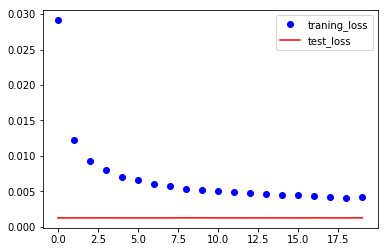

In [11]:
plt.plot(range(len(train_loss)), train_loss, 'bo', label='traning_loss')
plt.plot(range(len(test_loss)), test_loss, 'r', label='test_loss')
plt.legend()

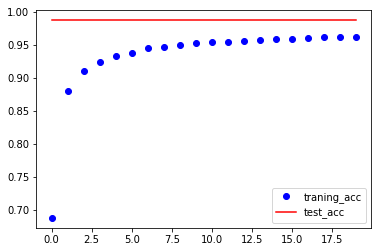

In [12]:
plt.plot(range(len(train_acc)), train_acc, 'bo', label='traning_acc')
plt.plot(range(len(test_acc)), test_acc, 'r', label='test_acc')
plt.legend()

In [ ]:
test_acc
test_loss

In [ ]:
##memory managed by the cashing allocator
torch.cuda.memory_cached()
torch.cuda.max_memory_cached()

In [ ]:
##memory occupied by tensors
torch.cuda.max_memory_allocated()

PyTorch uses a caching memory allocator to speed up memory allocations. Hence, the values shown in `nvidia-smi` usually don't reflect the true memory usage. 

In [ ]:
torch.cuda.empty_cache()

In [ ]:
del inputs

In [ ]:
model.train()

In [ ]:
model.eval()

In [ ]:
total

In [ ]:
for i, data in enumerate(trainload):
    print(i, data)

In [ ]:
##Model training
def fit(epoch, model, data_loader, phase='training'):
    
    if phase == 'training':
        model.train()
    if phase == 'validation': ##dropout and backpropagation not required in validation/test phase
        model.eval()
        volatile = True
        
    running_loss = 0.0
    running_correct = 0
    
    for batch_idx, (data, target) in enumerate(data_loader):
        
        #cuda1 = torch.device(1)
        data, target = data.cuda(), target.cuda()
        #data, target = Variable(data, volatile), Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
            
        output = model(data)
        ##torch.nn.functional.nll_loss(input, target, weight=None, 
        ##                             size_average=True, ignore_index=-100, 
        ##                             reduce=True)
        ##negative log-likelihood loss
        loss = F.nll_loss(output, target)
        running_loss += F.nll_loss(output, target, size_average=False).data
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        
        if phase == 'training':
            loss.backward()
            optimizer.step()
        
        loss = running_loss/len(data_loader.dataset)
        accuracy = 100 * running_correct/len(data_loader.dataset)
        
        print('{0:<20s} loss is {1:5.2f} and {2:<20s} accuracy is {3:5d}/{4:5d}{5:10.4f}'.format(phase, loss, phase, 
                                                                                                 running_correct, 
                                                                                                 len(data_loader.dataset), 
                                                                                                 accuracy))
              
        return loss, accuracy

In [ ]:
model = cnn()
#cuda1 = torch.device(1)
model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []

for epoch in range(1,20):
    epoch_loss, epoch_accuracy = fit(epoch, model, trainload, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, testload, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    
plt.plot(range(1, len(train_losses)+1), train_losses, 'bo', label = 'training loss')
plt.plot(range(1, len(val_losses)+1), val_losses, 'r', label = 'validation loss')
plt.legend()

In [ ]:
plt.plot(range(1, len(train_accuracy)+1), train_accuracy, 'bo', label='train accuracy')
plt.plot(range(1, len(val_accuracy)+1), val_accuracy, 'r', label='val accuracy')
plt.legend()